# Saudi Arabia General Analysis (Population-Cities-Coffeeshops-AQAR)

#### Install Libraries :

In [1]:
!pip install pandas
!pip install folium
!pip install matplotlib
!pip install seaborn
!pip install geopandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import Libraries

In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
# Load the datasets
df1 = pd.read_csv('datasets/DatasetForCoffeeSales2.csv')
df2 = pd.read_csv('datasets/saudi_cities_geocoding.csv')
df3 = pd.read_csv('datasets/Population.csv')
df4 = pd.read_csv('datasets/SA_Aqar.csv')

In [5]:
# first rows of first dataset
df1.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [6]:
# first rows of saudi_cities_geocoding.csv
df2.head()

,City,Latitude,Longitude
0,Riyadh,24.7136,46.6753
1,Jeddah,21.2854,39.2376
2,Mecca,21.3891,39.8579
3,Medina,24.5247,39.5692
4,Dammam,26.3927,49.9777


### Map Visualization of cities :

In [19]:
riyadhmap = folium.Map(location=[24.7136, 46.6753], zoom_start=5)
jeddahmap = folium.Map(location=[21.3891, 39.8579], zoom_start=5)
meccamap = folium.Map(location=[21.4225, 39.8262], zoom_start=5)
medinamap = folium.Map(location=[24.5247, 39.5692], zoom_start=5)
dammammap = folium.Map(location=[26.4207, 50.0888], zoom_start=5)




folium.Marker([24.7136, 46.6753], tooltip="Riyadh", popup="Riyadh").add_to(riyadhmap)
folium.Marker([21.3891, 39.8579], tooltip="Jeddah", popup="Jeddah").add_to(jeddahmap)
folium.Marker([21.4225, 39.8262], tooltip="Mecca", popup="Mecca").add_to(meccamap)
folium.Marker([24.5247, 39.5692], tooltip="Medina", popup="Medina").add_to(medinamap)
folium.Marker([26.4207, 50.0888], tooltip="Dammam", popup="Dammam").add_to(dammammap)


#### Saving maps as HTML files :

In [20]:
riyadhmap.save('maps/riyadhmap.html')
jeddahmap.save('maps/jeddahmap.html')
meccamap.save('maps/meccamap.html')
medinamap.save('maps/medinamap.html')
dammammap.save('maps/dammammap.html')

### Maps :

In [22]:
riyadhmap

In [23]:
jeddahmap

In [24]:
dammammap

In [25]:
meccamap

In [26]:
medinamap

## Analyzing the coffee dataset

In [7]:
# Analyzing the first dataset
df1.describe()

,Customer_ID,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,51.669863,36.794521,26.080822,959.924658,97.393151,862.531507
std,29.014339,4.955104,14.480971,551.282730,123.401350,509.032315
min,1.000000,30.000000,1.000000,30.000000,0.000000,24.000000
25%,27.250000,35.000000,14.000000,495.000000,0.000000,448.000000
50%,52.000000,35.000000,27.000000,960.000000,13.000000,840.000000
75%,77.000000,40.000000,39.000000,1400.000000,192.000000,1260.000000
max,100.000000,45.000000,49.000000,2205.000000,441.000000,2205.000000


In [8]:
df1_column_needed = ["City","Category","Product"]

In [11]:
cleaned_data = df1[df1_column_needed].copy()

cleaned_data.dropna(inplace=True)

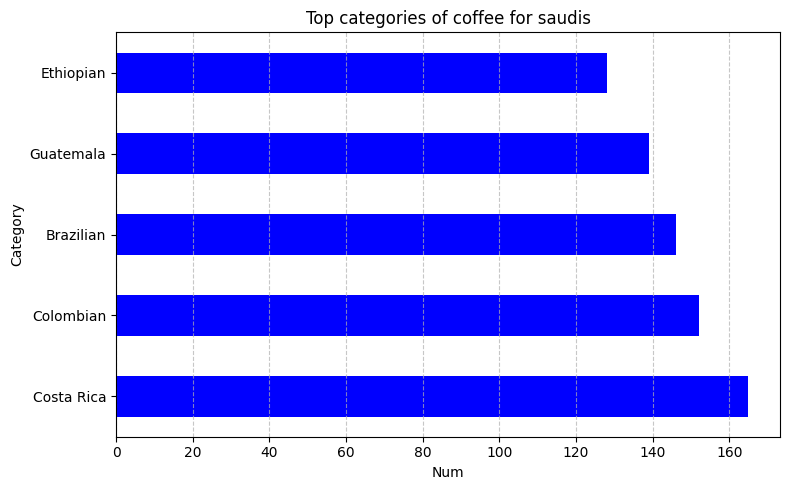

In [14]:
top_coffees = cleaned_data['Product'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_coffees.plot(kind='barh', color='blue')
plt.title('Top categories of coffee for saudis')
plt.xlabel('Num')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()